# Generate Region of Interests (ROI) labeled arrays for simple shapes
This example notebook explain the use of analysis module "skxray/core/roi" https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/roi.py 

In [1]:
import skxray.core.roi as roi
import skxray.core.correlation as corr

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

import xray_vision.mpl_plotting as mpl_plot

:0: FutureWarning: IPython widgets are experimental and may change in the future.


###Easily switch between interactive and static matplotlib plots

In [2]:
interactive_mode = False

import matplotlib as mpl
if interactive_mode:
    %matplotlib notebook
else:
    %matplotlib inline

backend = mpl.get_backend()
cmap='Dark2'

## Rectangle region of interests.

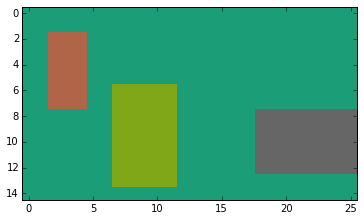

In [3]:
# Image shape which is used to determine the maximum extent of output pixel coordinates
shape = (15, 26)

# coordinates of the upper-left corner and width and height of each rectangle
roi_data = np.array(([2, 2, 6, 3], [6, 7, 8, 5], [8, 18, 5, 10]),
                        dtype=np.int64)

#Elements not inside any ROI are zero; elements inside each ROI are 1, 2, 3, corresponding
# to the order they are specified in coords.
label_array = roi.rectangles(roi_data, shape)
roi_inds, pixel_list = roi.extract_label_indices(label_array)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

## Draw annual (ring-shaped) regions of interest

In [4]:
center = (100., 100.)   # center of the rings

# Image shape which is used to determine the maximum extent of output pixel coordinates
img_shape = (200, 205)   

first_q = 10.0 # inner radius of the inner-most ring
delta_q = 5.0  #ring thickness

num_rings = 7  # number of Q rings

# step or spacing, spacing between rings 
one_step_q = 5.0  #  one spacing between rings

step_q = [2.5, 3.0, 5.8]   # differnt spacing between rings

### Test when there is same spacing between rings

In [5]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, spacing=one_step_q,
                           num_rings=num_rings)
edges

array([[ 10.,  15.],
       [ 20.,  25.],
       [ 30.,  35.],
       [ 40.,  45.],
       [ 50.,  55.],
       [ 60.,  65.],
       [ 70.,  75.]])

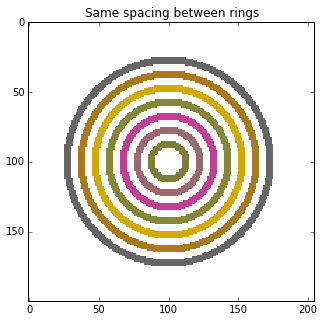

In [6]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Same spacing between rings")
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

### Test when there is different spacing between rings

In [7]:
# inner and outer radius for each ring

edges = roi.ring_edges(first_q, width=delta_q, spacing=step_q,
                           num_rings=4)
print("edges when there is different spacing between rings", edges)

('edges when there is different spacing between rings', array([[ 10. ,  15. ],
       [ 17.5,  22.5],
       [ 25.5,  30.5],
       [ 36.3,  41.3]]))


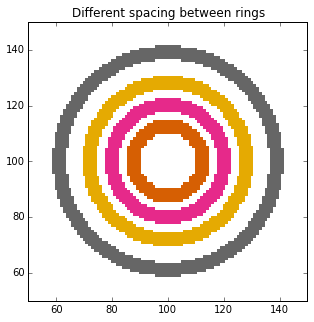

In [8]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Different spacing between rings")
axes.set_xlim(50, 150)
axes.set_ylim(50, 150)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()


### Test when there is no spacing between rings

In [9]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, num_rings=num_rings)
edges

array([[ 10.,  15.],
       [ 15.,  20.],
       [ 20.,  25.],
       [ 25.,  30.],
       [ 30.,  35.],
       [ 35.,  40.],
       [ 40.,  45.]])

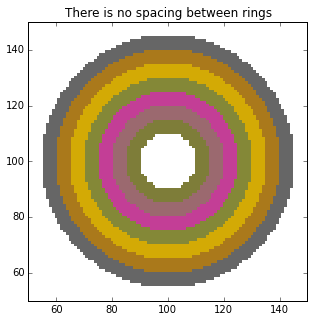

In [10]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.rings(edges, center, img_shape)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("There is no spacing between rings")
axes.set_xlim(50, 150)
axes.set_ylim(50, 150)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()

### Generate a ROI of Segmented Rings¶

In [11]:
center = (75, 75)   # center of the rings

#Image shape which is used to determine the maximum extent of output pixel coordinates
img_shape = (150, 140) 

first_q = 5.0  # inner radius of the inner-most ring
delta_q = 5.0  #ring thickness
num_rings = 4  # number of rings

slicing = 4 # number of pie slices or list of angles in radians
spacing = 4 # margin between rings, 0 by default

#### find the inner and outer radius of each ring


In [12]:
# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=delta_q, spacing=spacing,
                           num_rings=num_rings)

edges

array([[  5.,  10.],
       [ 14.,  19.],
       [ 23.,  28.],
       [ 32.,  37.]])

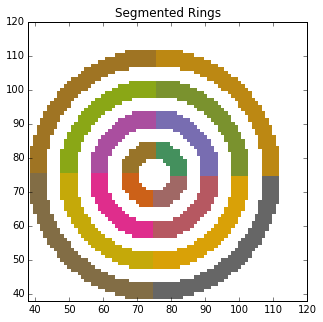

In [13]:
#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.segmented_rings(edges, slicing, center,
                                      img_shape, offset_angle=0)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Segmented Rings")
axes.set_xlim(38, 120)
axes.set_ylim(38, 120)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()


### Generate a  ROI of Pies

In [14]:
first_q = 0  

# inner and outer radius for each ring
edges = roi.ring_edges(first_q, width=50, num_rings=1)

edges

array([[  0.,  50.]])

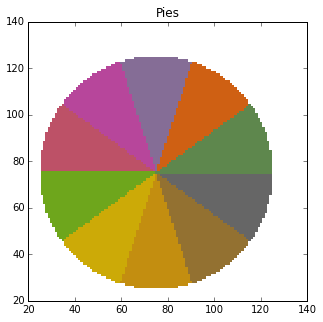

In [15]:
slicing = 10 # number of pie slices or list of angles in radians

#Elements not inside any ROI are zero; elements inside each
#ROI are 1, 2, 3, corresponding to the order they are specified in edges.
label_array = roi.segmented_rings(edges, slicing, center,
                                      img_shape, offset_angle=0)

# plot the figure
fig, axes = plt.subplots(figsize=(6, 5))
axes.set_title("Pies")
axes.set_xlim(20, 140)
axes.set_ylim(20, 140)
im = mpl_plot.show_label_array(axes, label_array, cmap)
plt.show()
plt.figure()

In [16]:
import skxray
print(skxray.__version__)


0.0.4+105.ge27b978
